<a href="https://colab.research.google.com/github/financieras/pyCourse/blob/main/ejemplos/caso3_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 1
Estudie los archivos:

* calisto3_0260.ipynb VAN y TIR
* calisto3_0270.ipynb Préstamos
* calisto3_0280.ipynb Bonos, ETTI, forward, arbitraje

Vea el vídeo de este post:

* [Valor Actual en Excel y en Python](https://www.excelavanzado.com/2019/04/valor-actual-en-excel-y-en-python.html)

# Reto 2
Ejemplo práctico de análisis de inversiones utilizando el VAN.

## VAN ó NPV

* VAN = Valor Actual Neto
* NPV = Net Present Value
* Consiste en actualizar los fluos de caja (cobros y pagos) de una inversión al momento presente
* Lo que hacemos para calcular el VAN es traer (descontar) los flujos de caja al origen

In [ ]:
!pip install numpy-financial    # instalamos la librería numpy-financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy_financial as npf   # importamos la librería numpy-financial con el alias npf
import numpy as np

### Ejemplo de inversión

* Calcular la rentabilidad, en euros, de un proyecto de inversión en el que tenemos que desembolsar 1000 euros, y después sabemos que nos va a reportar unos flujos de caja de 200 € el primer año, 300 € el segundo, 1000 euros el tercero, 500 euros el cuarto.
* La tasa de descuento es 5%.

#### Método 1

In [ ]:
cf = [-1000, 200, 300, 1000, 500]  # generamos una lista con los flujos de caja, nótese que el primero es negativo
r = 0.05                           # tasa de descuento
f = 1+r                            # factor

VAN = 0
for t in range(len(cf)):
    VAN += cf[i] / f**t              # descontamos los flujos de caja

print(VAN)

737.7738699410224


#### Método 2
* Este método es equivalente a la función en Excel **VAN** (Español) **NPV** (Inglés)
* En este caso, hay una diferencia respecto a Excel, ya que el desemboloso inicial en Excel debe estar fuera de los flujos de caja, siendo necesario considerar fuera de la fórmula financiera el flujo de caja negtivo
* Sin embargo, en Python debe estar incluído en los flujos de caja

In [ ]:
cf = [-1000, 200, 300, 1000, 500]   # generamos una lista con los flujos de caja, nótese que el primero es negativo
r = 0.05                            # tasa de descuento
f = 1+r                             # factor

VAN2 = npf.npv(rate=r, values=cf)
print(VAN2)

737.7738699410224


#### Método 3
* Considerando los flujos de caja como un ndarray al usar la librería numpy
* Al ser un ndarray podemos trabajar con vectores de forma más sencialla, como si estuvieramos haciendo álgebra con matrices

In [ ]:
cf = np.array(cf)
r = 0.05
f = 1+r

t = np.arange(0,5)   # vector tiempo, equivale a poner t=np.array([0, 1, 2, 3, 4])

VA = cf / f**t
VAN = VA.sum()       # ndarray.sum() Devuelve la suma de los elementos de un vector ndarray
print(VAN)

737.7738699410224


#### Método 4
Es una maravilla poder operar algebráicamente con vectores de tipo ndarray

In [ ]:
VAN = (cf/f**t).sum()
print(VAN)

737.7738699410224


# Reto 3
Ejemplo práctico de análisis de inversiones utilizando la TIR.

## TIR ó IRR

* TIR = Tasa interna de retorno
* IRR = Internal rate of return
* Es la tasa de interés o rentabilidad que ofrece una inversión
* Es el porcentaje de beneficio o pérdida que tendrá una inversión en base a lo invertido
* Es la tasa de descuento que hace que el VAN sea igual a cero

In [ ]:
!pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy_financial as npf
import matplotlib.pyplot as plt
import numpy as np

### Ejemplo de inversión
* Calcular la rentabilidad, en porcentaje, de un proyecto de inversión en el que tenemos que desembolsar 1000 euros, y después sabemos que nos va a reportar unos flujos de caja de 200 € el primer año, 300 € el segundo, 1000 euros el tercero, 500 euros el cuarto.
* La tasa de descuento es 5%.

#### Método 1
* Pedimos a Python que nos calcule el VAN por cada periodo, y a la par le pedimos que nos calcule la rentabilidad hasta ese momento.
* La rentabilidad que buscamos se encuentra en el momento en el que nuestro VAN es 0.
* Por ello, establecemos un bucle while que va calculando el VAN y la rentabilidad hasta llegar a ese momento.
* Como marcadores creamos la tolerancia, que podemos disminuir para ajustar al máximo
* cuanta menor sea nuestra tolerancia más tiempo tarda Python en darnos una respuesta
* En este caso, nuesta rentabilidad es de un 28,11 %

In [ ]:
cf = [-1000, 200, 300, 1000, 500]   # lista con los flujos de caja, nótese que el primero es negativo
r = 0.05                            # tasa de descuento de partida
f = 1+r                             # factor

paso = 0.000001
objetivo = 0                        # recordemos que al llegar a la TIR el VAN se hace cero, ese es mi objetivo
tolerancia = 0.001

while True:
    f = 1 + r
    VAN = 0
    for t in range(len(cf)):
        VAN += cf[t]/f**t
    diff = VAN - objetivo
    
    if abs(diff) > tolerancia:
        if diff < 0:
            r -= paso
        elif diff > 0:
            r += paso
    else:
        break

print(VAN, r)

-0.0002973604021008214 0.2811679999993661


#### Método 2
* El método 2 es equivanlente a la fórmula en Excel TIR (Español) o IRR (Inglés)
* Los parámetros necesarios son los mismos
* teniendo en cuenta que si un año no se produce flujo de caja hay que indicarlo mediante un 0, al igual que en Excel.


In [ ]:
cf = [-1000, 200, 300, 1000, 500]   # lista con los flujos de caja, nótese que el primero es negativo

TIR = npf.irr(cf)
print(TIR)

0.28116785840687086


#### Método 3
Método de la bisectriz para calcular la TIR

In [ ]:
from numpy_financial import npv
from numpy_financial import irr

def VAN(k,flujos):
    va=0
    for i,f in enumerate(flujos):
        va+=f/(1+k)**i
    return va

def TIR(cf):
    k_inicial=0
    k_final=1 #tasa de descuento del 100%
    a=npv(k_inicial,cf)
    b=npv(k_final,cf)
    if a==0:
        return k_inicial
    elif b==0:
        return k_final
    elif a*b>0:  #Si el producto es positivo es que ambos VAN tienen el mismo signo,o los 2 positivos o los 2 neg.
        print("En el rango considerado no se corta el eje") #al ser los dos VAN del mismo signo no hay corte
        return 'NaN'
    else:
        while True:
            k_medio=(k_inicial+k_final)/2
            m=npv(k_medio,cf)              # m es el VAN para el k_medio
            if abs(m)<1e-12:               # si el valor absoluto de m es menor que el error admitido (tolerancia)
                break                      # paramos el bucle y luego retornamos el k_medio 
            else:
                if a*m<0:                  # si el VAN de la izquierda y el del medio tienen distinto signo
                    k_final=k_medio
                elif b*m<0:                # si el VAN de la derecha y el del medio tienen el mismo signo
                    k_inicial=k_medio
        return k_medio
    
cf=[-1000, 200, 300, 1000, 500]    #Generamos una lista con los flujos de caja. Nótese que el primero es negativo.
#cf=[1000, -200, -300, -1000, -500] #En este caso, con los signos cambiados tambien calcula bien la TIR
#cf=[-1000, 200, 300, -1000, 500]   #En este caso, con una TIR negativa, avisa que en el rango entre 0% y 100% no hay corte

k=0.1
print("VAN({}) =".format(k),VAN(k,cf))
print("NPV({}) =".format(k),npv(k,cf))
print("IRR =",irr(cf))
print("TIR =",TIR(cf))

VAN(0.1) = 522.5735946998152
NPV(0.1) = 522.5735946998152
IRR = 0.28116785840687086
TIR = 0.28116785840687086


### Gráfico de la TIR
* En este gráfico podemos comprobar cómo el VAN va variando a distintos tipos de interés (línea roja).
* Tenemos que tener en cuenta que este sería un proyecto, por tanto, a mayor tipo de interés más costosa será nuestra financiación y por tanto disminuye nuestro VAN.
* En la línea azul nos marca cuando VAN = 0, y justo cuando se cruza con nuestra línea roja podemos decir que nos encontramos con la TIR.

In [ ]:
cf=[-1000, 200, 300, 1000, 500]
r = 0.05

VAN = 0
for i in range(len(cf)):
    VAN += cf[i]/(1+r)**(i)    #Generamos el VAN de nuestro proyecto

L = list(range(0,351))         #Vamos a generar una lista de supuestos tipos de interés, va poder ver como cambia nuestro VAN

rs = []
for i in L:
    rs.append(i/1000)

vans = []                      #Calculamos el VAN para cada uno de los intereses generados en la anterior lista.
for i in rs:
    van = 0
    for j in range(len(cf)):
        van += cf[j]/(1+i)**(j)
    vans.append(van)
    

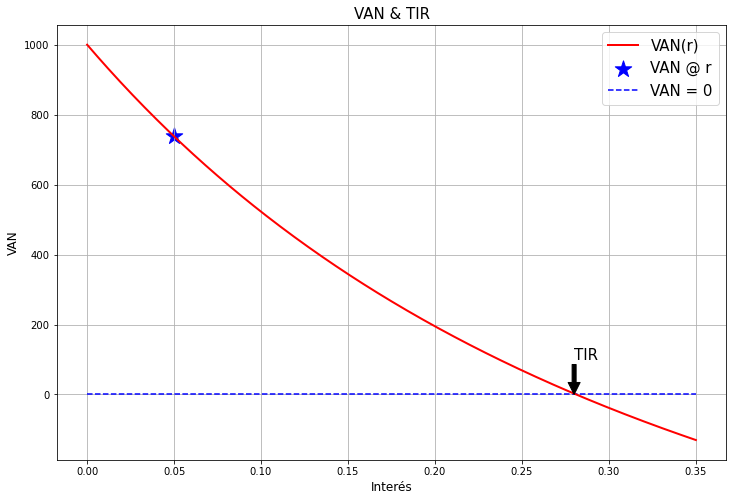

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(x = r, y = VAN, s = 300, c="blue", marker = '*', label = "VAN @ r")
plt.plot(rs, vans, color = "red", linewidth = 2, linestyle='-', label = "VAN(r)")
plt.grid()
plt.hlines(y=0, xmin = rs[0], xmax=rs[-1], linestyle="dashed", color="blue", label="VAN = 0")
plt.title("VAN & TIR", fontsize=15)
plt.xlabel("Interés", fontsize=12)
plt.ylabel("VAN", fontsize=12)
plt.annotate("TIR", xy = (0.280, 0), xytext=(0.280, 100), arrowprops = {'color':'black'}, fontsize=15)
plt.legend(loc="best", fontsize=15)
plt.show()


# Reto 4
Ejemplo práctico de análisis de inversiones utilizando el Payback.

# Payback o Periodo Medio de Retorno.

Cuando analizamos un proyecto, no solo tenemos en cuenta el VAN y su TIR, debemos valorar otros factores, como son el tiempo en el que vamos a recuperar nuestra inversión, conocido como Periodo Medio de Maduración o Payback en inglés.

In [ ]:
FC = [-2000, 200, 1500, 700, 100, 500] #Flujos de caja de un proyecto

Acum_FC = 0

for i in range(len(FC)):
    Acum_FC += FC[i]
    
    if Acum_FC > 0:
        print("El Payback del Proyecto son {} años". format(i))
        break
        
    elif Acum_FC <= 0 and i == len(FC)-1:
        print("El proyecto no recupera su inversión")

El Payback del Proyecto son 3 años


# Reto 5
Ejemplo práctico de análisis de inversiones utilizando el Índice de rentabilidad.

# ÍNDICE DE RENTABILIDAD#

El índice de rentabilidad nos permite realizar un ranking de distintos proyectos teniendo en cuenta el que mayor valor va a aportar a nuestra empresa.

In [ ]:
FC = [-2000, 200, 1500, 700, 100, 500]
r = 0.05
II = []
FCP = []

for i in FC:
    if i < 0:
        II.append(i)
    else:
        FCP.append(i)
        
VA = npf.npv(r, FCP)

IR = VA / II
print(-IR)

[1.38061353]
